In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read file consist of data from exam 1, exam2 and college admit
df=pd.read_csv('D:\ML Andrew Ngs\Week3\coding assn\machine-learning-ex2\ex2\ex2data1.txt',names=['exam1','exam2','admit'])

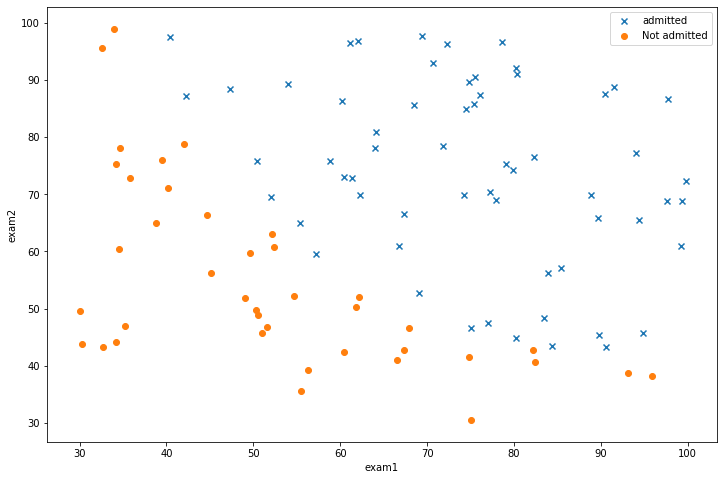

In [3]:
# Plotting the data

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(x=df[df['admit']==1]['exam1'],y=df[df['admit']==1]['exam2'],marker='x',label='admitted');

ax.scatter(x=df[df['admit']==0]['exam1'],y=df[df['admit']==0]['exam2'],marker='o',label='Not admitted')

ax.set_xlabel('exam1')
ax.set_ylabel('exam2')

ax.legend();


In [4]:
# collecting feature in X and admit in Y
X=df[['exam1','exam2']]
Y=df[['admit']]

In [5]:
X=np.array(X)
ones=np.ones(shape=(X.shape[0],1))
X=np.hstack((ones,X))
Y=np.array(Y)
theta=np.zeros(shape=(X.shape[1],1))
m=len(df)

In [6]:
def sigmoid(X,theta):
    z=np.dot(X,theta)
    return 1/(1+np.exp(-z))

def CostFunction(theta,X,Y):
    h=sigmoid(X,theta)
    err=-np.sum((Y*np.log(h)+(1-Y)*np.log(1-h)))
    J=(1/m)*err
    return J

def Gradient(theta,X,Y):
    Y_pred=sigmoid(X,theta)
    grad=(Y_pred-Y)
    theta=(1/m)*np.dot(X.T,grad)
    return theta


In [7]:
# Finding gradient descent and cost fnction for intial theta
int_gd=Gradient(theta,X,Y)
int_cf=CostFunction(theta,X,Y)
print('For initial theta cost function is {}'.format(int_cf))

For initial theta cost function is 0.6931471805599453


#### Andrew Ng used fminuc() function for optimization

In python we have scipy library from which we will use fmin_tnc to find the optimise cost function

In [8]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=CostFunction, x0=theta, fprime=Gradient, args=(X, Y.flatten()))
optimised_theta=np.reshape(result[0],(3,1))

Cost_optimised=CostFunction(optimised_theta,X,Y)


print("optimised theta is {} and Cost function is {}".format(optimised_theta,Cost_optimised))

optimised theta is [[-25.1613186 ]
 [  0.20623159]
 [  0.20147149]] and Cost function is 0.2034977015894747


In [9]:
# Plotting the result

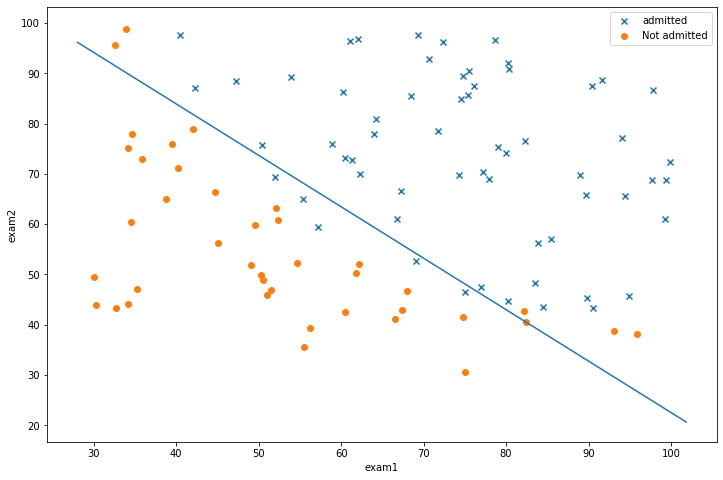

In [10]:
X_axis=[X[:,1].min()-2,X[:,1].max()+2]
Y_axis=-1/(optimised_theta[2])*(optimised_theta[1]*X_axis+optimised_theta[0])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=df[df['admit']==1]['exam1'],y=df[df['admit']==1]['exam2'],marker='x',label='admitted');
ax.scatter(x=df[df['admit']==0]['exam1'],y=df[df['admit']==0]['exam2'],marker='o',label='Not admitted')

ax.set_xlabel('exam1')
ax.set_ylabel('exam2')

ax.legend()
ax.plot(X_axis,Y_axis);


In [11]:
# Prediction

In [12]:
X_predict=np.array([45,85])
on=np.ones(shape=(1,))
X_predict=np.hstack((on,X_predict))

prediction=sigmoid(X_predict,optimised_theta)

print(" For Exam 1 score 45 and Exam 2 score 85 probability of admit is {}".format(prediction[0]))

 For Exam 1 score 45 and Exam 2 score 85 probability of admit is 0.7762906233213765


In [13]:
# Accuracy of model

In [14]:
def accuracy(theta,X,Y):
    '''Function will take features and uses optimised theta value. 
    Then it comapres how many features X are corectly classified as Y'''
    
    pred=[sigmoid(X,optimised_theta)>=0.5]
    pred_acc=np.mean(pred==Y)
    return(pred_acc*100)
    
acc=accuracy(optimised_theta,X,Y)

print ("Accuracy of our model is {}".format(acc))

Accuracy of our model is 89.0
